In [41]:
import sys
import geopandas as gpd
import pandas as pd
import fiona
from shapely.geometry import Polygon
from shapely.ops import transform
import math
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob

In [7]:
fiona.listlayers(r'd:\UTCloud\DGGS\grids\grids.gpkg')

['DGGRID_ISEA4H_7',
 'DGGRID_ISEA3H_9',
 'rhpix_5',
 'DGGRID_ISEA7H_5',
 'rhpix_5_anomalies',
 'DGGRID_ISEA7H_5_anomalies',
 'DGGRID_ISEA3H_9_clean',
 'DGGRID_ISEA4D_7',
 'H3_4',
 'EAGGR4T_7',
 'DGGRID_FULLER_7H',
 's2_8',
 'DGGRID_ISEA7H_5_clean',
 'DGGRID_FULLER_7H_clean',
 'rhpix_5_clean',
 's2_8_clean',
 'DGGRID_FULLER_4T',
 'DGGRID_ISEA4T_7',
 'DGGRID_FULLER_4T_clean',
 'DGGRID_ISEA4T_7_clean',
 'DGGRID_ISEA4D_7_clean',
 'DGGRID_FULLER_4D_clean',
 'DGGRID_FULLER_4D']

In [6]:
dfs = []

In [9]:
for path in glob.glob(r'd:\UTCloud\DGGS\working\Python\PyProj\cell_stats\results\*.csv'):
    dfs.append(pd.read_csv(path))

In [11]:
all_stats = pd.concat(dfs)

In [36]:
all_stats[all_stats['date_line_cross_error_cells']>0]

,resolution,min_area,max_area,std,mean,num_cells,std_area_std,std_area_range,zsc_std,zsc_std_range,date_line_cross_error_cells,other_geom_anomalies,dggs,proj
0,1,1.294450e+13,1.717268e+13,2.043340e+12,1.563486e+13,22,0.130691,0.270433,0.008538,0.017439,8,0,FULLER3H,LAEA
1,2,4.001171e+12,5.919260e+12,5.496610e+11,5.533242e+12,80,0.099338,0.346648,0.006120,0.019495,10,0,FULLER3H,LAEA
2,3,1.452315e+12,1.992182e+12,8.895722e+10,1.876166e+12,248,0.047414,0.287750,0.003755,0.021754,20,0,FULLER3H,LAEA
3,4,4.316232e+11,6.615221e+11,2.603742e+10,6.286146e+11,772,0.041420,0.365723,0.002332,0.022006,32,0,FULLER3H,LAEA
4,5,1.970439e+11,2.216655e+11,6.036762e+09,2.098853e+11,2356,0.028762,0.117310,0.002010,0.008478,52,0,FULLER3H,LAEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2.303565e+11,4.134775e+11,4.933125e+10,3.321368e+11,1487,0.148527,0.551342,0.010250,0.050834,33,0,s2,LAEA
4,5,5.391634e+10,1.045714e+11,1.253383e+10,8.309832e+10,6017,0.150831,0.609579,0.010386,0.056626,65,0,s2,LAEA
5,6,1.358600e+10,2.610304e+10,3.146717e+09,2.077300e+10,24201,0.151481,0.602563,0.010411,0.059532,129,0,s2,LAEA
6,7,3.384899e+09,6.530371e+09,7.875267e+08,5.192471e+09,97065,0.151667,0.605776,0.010412,0.060983,257,0,s2,LAEA


In [42]:
all_stats['mean_area_log'] = np.log10(all_stats['mean'])

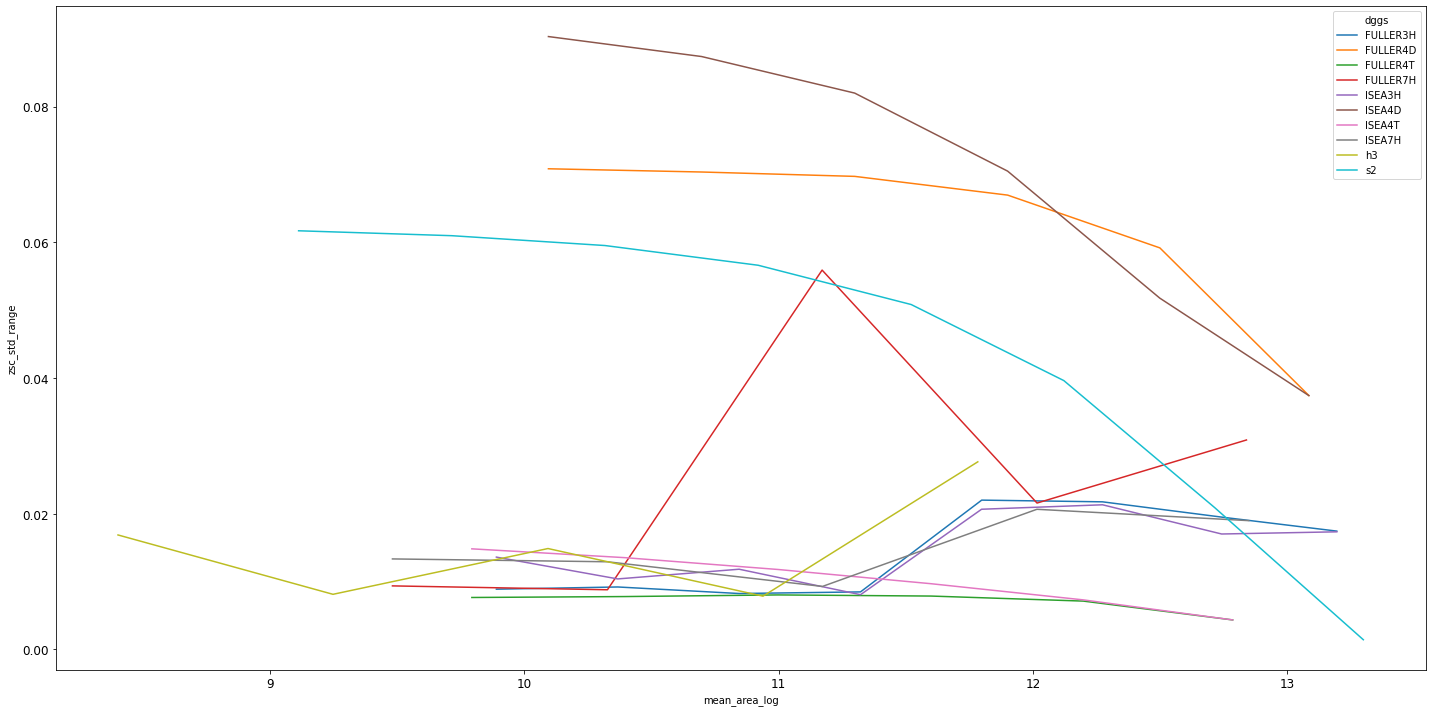

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=all_stats[all_stats['date_line_cross_error_cells']>0], x='mean_area_log', y='zsc_std_range',  hue='dggs', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()